In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import tempfile, os, zipfile
from PIL import Image
import requests
from matplotlib import pyplot as plt
#mport squarify
import random
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

from os import listdir
from os.path import isfile, join


In [18]:
import requests
from urllib.parse import urlencode

base_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?'
public_key = 'https://disk.yandex.com.am/d/1mFfgWQxggpeUQ'
final_url = base_url + urlencode(dict(public_key=public_key))
response = requests.get(final_url)

download_url = response.json()['href']

download_response = requests.get(download_url)


file = tempfile.TemporaryFile()
file.write(download_response.content)
fzip = zipfile.ZipFile(file)
fzip.extractall('./TJ_data')

file.close()
fzip.close()

# https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification/download?datasetVersionNumber=3

In [19]:
listdir("./TJ_data") # Tom&Jerry_dataset
listdir("./TJ_data/Tom&Jerry_dataset")

['archive.zip']

In [20]:
fzip = zipfile.ZipFile("./TJ_data/Tom&Jerry_dataset/archive.zip")
fzip.extractall('./TJ_data/dataset')

fzip.close()

In [21]:


dataset_dir = "./TJ_data/dataset"
tom_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/tom"
jerry_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/jerry"
tj_0_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/tom_jerry_0"
tj_1_dir = "./TJ_data/dataset/tom_and_jerry/tom_and_jerry/tom_jerry_1"

print(listdir(dataset_dir))


['ground_truth.csv', 'challenges.csv', 'tom_and_jerry']


In [22]:
RANDOM_STATE = 42

In [23]:
import os
import numpy as np
from PIL import Image

folder_path = './TJ_data/dataset/tom_and_jerry/tom_and_jerry/'


def images_to_array(folder_path, class_name):

    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    data = []
    target= []
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)

        img = Image.open(image_path)

        img = img.resize((224, 224))

        img_array = np.array(img, dtype=float) / 255.0  # Нормализация значений пикселей к диапазону [0, 1]
        img_vector = img_array.flatten()

        data.append(img_vector)
        target.append(class_names.index(class_name))


    result_array = np.array(data)
    target_array = np.array(target)
    return result_array, target_array

folder_path = './TJ_data/dataset/tom_and_jerry/tom_and_jerry/'
class_names =  ['jerry', 'tom', 'tom_jerry_0', 'tom_jerry_1']
result_array = None
target_result_array = None


for class_name in class_names:
    class_directory = os.path.join(folder_path, class_name)
    class_array, target_array = images_to_array(class_directory, class_name)

    if result_array is None:
        result_array = class_array
    else:
        result_array = np.concatenate((result_array, class_array))
    if target_result_array is None:
        target_result_array=target_array
    else:
        target_result_array=np.concatenate((target_result_array, target_array))

print(result_array.shape)
print(target_result_array.shape)

(5478, 150528)
(5478,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(result_array,target_result_array,
                                                    test_size=0.25,
                                                    random_state=1984)

PCA

In [25]:
from sklearn.decomposition import PCA

In [38]:
pca = PCA(n_components=500).fit(X_train)

In [39]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
clf = SVC(kernel='rbf', class_weight ='balanced')


SVC без PCA

In [30]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.745985401459854

In [31]:
y_pred=clf.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.67      0.79      0.72       296
           1       0.80      0.77      0.78       497
           2       0.71      0.64      0.67       366
           3       0.81      0.82      0.82       211

    accuracy                           0.75      1370
   macro avg       0.75      0.75      0.75      1370
weighted avg       0.75      0.75      0.75      1370



SVC после PCA

In [42]:
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca,y_test)

0.7627737226277372

In [43]:
y_pred_pca = clf.predict(X_test_pca)

In [44]:
print(classification_report(y_test,y_pred_pca))


              precision    recall  f1-score   support

           0       0.68      0.81      0.74       296
           1       0.82      0.77      0.80       497
           2       0.73      0.66      0.70       366
           3       0.80      0.85      0.83       211

    accuracy                           0.76      1370
   macro avg       0.76      0.77      0.77      1370
weighted avg       0.77      0.76      0.76      1370



ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (1370).

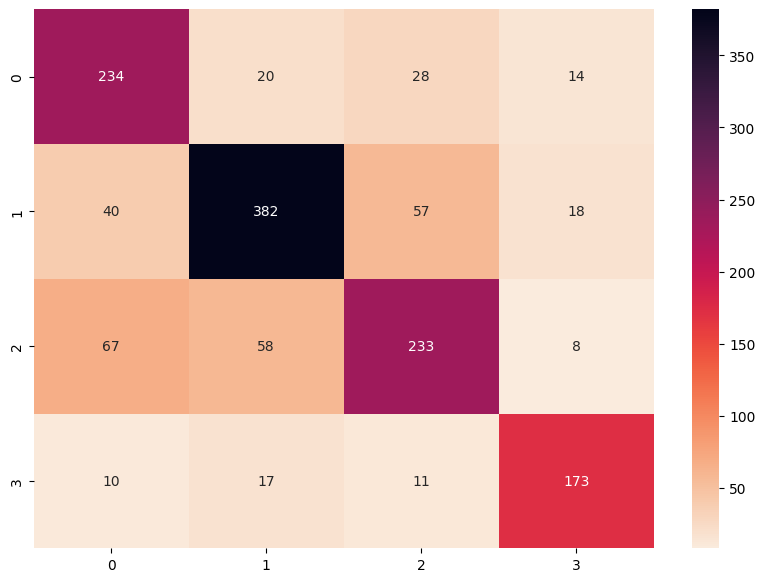

In [36]:
import tensorflow as tf

# Calculate the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize = (10, 7))

sns.heatmap(cm,
annot = True,
fmt= '',
ax = ax,
cmap = 'rocket_r')

ax.set_yticklabels(X_test, va="center")
ax.set_xticklabels(X_test, ha="center")
ax.set_xlabel('\nPredicted Labels', fontsize = 13)
ax.set_ylabel('True Labels\n', fontsize = 13)

plt.title("Confusion Matrix", fontsize = 15);

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of labels (1370).

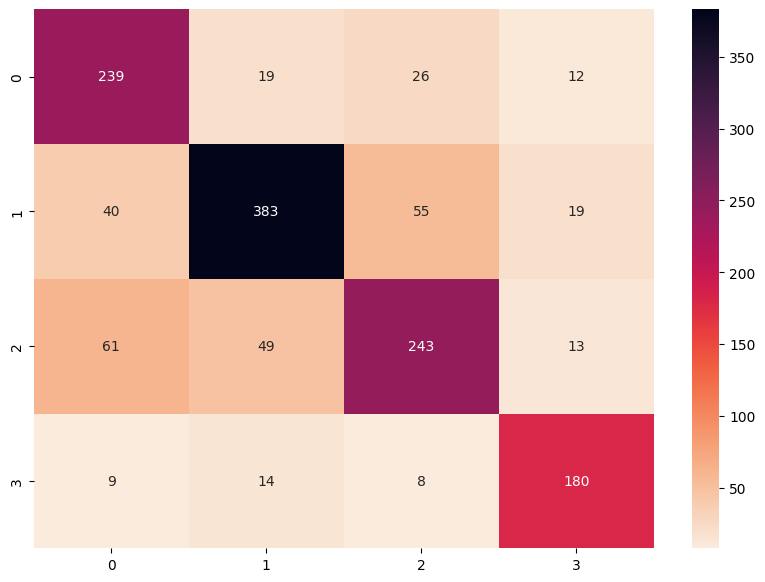

In [46]:
import tensorflow as tf

# Calculate the confusion matrix
cm = tf.math.confusion_matrix(y_test, y_pred_pca)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize = (10, 7))

sns.heatmap(cm,
annot = True,
fmt= '',
ax = ax,
cmap = 'rocket_r')

ax.set_yticklabels(X_test_pca, va="center")
ax.set_xticklabels(X_test_pca, ha="center")
ax.set_xlabel('\nPredicted Labels', fontsize = 13)
ax.set_ylabel('True Labels\n', fontsize = 13)

plt.title("Confusion Matrix", fontsize = 15);

In [ ]:

X_train.shape

(4108, 150528)

In [47]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [48]:
model = LogisticRegression(solver='liblinear')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_pca)
model.fit(X_scaled, y_train)

LogisticRegression(solver='liblinear')

In [49]:
y_pred = model.predict(X_test_pca)


LOGREG после обработки с PCA

In [51]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(solver='liblinear')
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train_pca)
model.fit(X_scaled, y_train)
y_pred = model.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-Score:', f1)

Accuracy: 0.4824817518248175
Precision: 0.5308643471955388
Recall: 0.4824817518248175
F1-Score: 0.47792821641695343
